# Imports 

In [1]:
### imports 

import pandas as pd 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import statsmodels.api as sm

# filter warnings 
import warnings 
warnings.filterwarnings('ignore')



In [2]:
### Load in training/test data 

data_no_chol_train = pd.read_csv('../fine-tune_1-16-24/datafest/data/no_chol/nhanes_input_train.csv')
data_no_chol_val = pd.read_csv('../fine-tune_1-16-24/datafest/data/no_chol/nhanes_input_validation.csv')
data_no_chol_test = pd.read_csv('../fine-tune_1-16-24/datafest/data/no_chol/nhanes_input_test.csv')

# data_with_chol_train = pd.read_csv('../fine-tune_1-16-24/datafest/data/with_chol/nhanes_input_train.csv')
# data_with_chol_val = pd.read_csv('../fine-tune_1-16-24/datafest/data/with_chol/nhanes_input_validation.csv')
# data_with_chol_test = pd.read_csv('../fine-tune_1-16-24/datafest/data/with_chol/nhanes_input_test.csv')

# Prepare Data 

In [14]:
# define covariates
X_list = [
            # "svy_weight_mec", "svy_psu", 
            "svy_strata", "svy_year", 
            "svy_subpop_htn", "svy_subpop_chol", "demo_age_cat", "demo_race", "demo_age_years", 
            "demo_pregnant", "demo_gender", #"bp_med_use", 
            "bp_med_recommended_jnc7", 
            "bp_med_recommended_accaha", "bp_med_recommended_escesh", 
            #"bp_med_n_class", "bp_med_n_pills", 
            "bp_med_combination", "bp_med_pills_gteq_2", "bp_med_ace", 
            "bp_med_aldo", "bp_med_alpha", "bp_med_angioten", "bp_med_beta", "bp_med_central", 
            "bp_med_ccb", "bp_med_ccb_dh", "bp_med_ccb_ndh", "bp_med_diur_Ksparing", 
            "bp_med_diur_loop", "bp_med_diur_thz", "bp_med_renin_inhibitors", "bp_med_vasod", 
            "cc_smoke", "cc_bmi", "cc_diabetes", "cc_ckd", "cc_cvd_mi", "cc_cvd_chd", 
            "cc_cvd_stroke", "cc_cvd_ascvd", "cc_cvd_hf", "cc_cvd_any"
        ]   
y_list = ["bp_uncontrolled_140_90"]

# filter the input covariates 
data_no_chol_train_filtered = data_no_chol_train[X_list + y_list]
data_no_chol_val_filtered = data_no_chol_val[X_list + y_list]
data_no_chol_test_filtered = data_no_chol_test[X_list + y_list]

# check missing columns 
#print(data_no_chol_train_filtered.isna().sum())
#print(data_no_chol_val_filtered.isna().sum())
#print(data_no_chol_test_filtered.isna().sum())

# drop missing data 
data_no_chol_train_filtered.dropna(inplace=True)
data_no_chol_val_filtered.dropna(inplace=True)
data_no_chol_test_filtered.dropna(inplace=True)

print(data_no_chol_test_filtered)


# convert categorical variables to categories 
LE = LabelEncoder()

for col in data_no_chol_train_filtered: 
   if (data_no_chol_train_filtered[col].dtype == 'object') or (col == 'demo_age_years') :
        # data_no_chol_train_filtered[col] = data_no_chol_train_filtered[col].astype('category')
       data_no_chol_train_filtered[col] = LE.fit_transform(data_no_chol_train_filtered[col])
       print(f"{col} {LE.classes_}")

for col in data_no_chol_test_filtered: 
    if data_no_chol_test_filtered[col].dtype == 'object' or (col == 'demo_age_years') :
        # data_no_chol_test_filtered[col] = data_no_chol_test_filtered[col].astype('category')
        data_no_chol_test_filtered[col] = LE.fit_transform(data_no_chol_test_filtered[col])
        print(f"{col} {LE.classes_}")


for col in data_no_chol_val_filtered: 
    if data_no_chol_val_filtered[col].dtype == 'object' or (col == 'demo_age_years') :
        # data_no_chol_val_filtered[col] = data_no_chol_val_filtered[col].astype('category')
        data_no_chol_val_filtered[col] = LE.fit_transform(data_no_chol_val_filtered[col])
        print(f"{col} {LE.classes_}")



# apply one-hot encoding
#d1 = pd.get_dummies(data_no_chol_train_filtered)
#d2 = pd.get_dummies(data_no_chol_val_filtered)
#d3 = pd.get_dummies(data_no_chol_test_filtered)


# Set up train/test/val datasets 
X_train, y_train = data_no_chol_train_filtered[X_list], data_no_chol_train_filtered[y_list]
X_val, y_val =  data_no_chol_val_filtered[X_list], data_no_chol_val_filtered[y_list]
X_test, y_test =  data_no_chol_test_filtered[X_list], data_no_chol_test_filtered[y_list]
X_test, y_test = pd.concat([X_val, X_test], axis= 0 ), pd.concat([y_val, y_test], axis= 0 )

print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")
# print(data_no_chol_train_filtered.dtypes)
print(data_no_chol_test_filtered)
print(y_train)

      svy_strata   svy_year  svy_subpop_htn  svy_subpop_chol demo_age_cat  \
1            172  2017-2020               0                1          75+   
3             14  2001-2002               1                1     45 to 64   
4             39  2003-2004               1                1     18 to 44   
5             99  2011-2012               1                0     45 to 64   
6             31  2003-2004               1                1     65 to 74   
...          ...        ...             ...              ...          ...   
2036          51  2005-2006               1                0     18 to 44   
2037          63  2007-2008               1                1          75+   
2038          50  2005-2006               1                0     65 to 74   
2039         125  2015-2016               1                1     45 to 64   
2040           3  1999-2000               1                1     65 to 74   

               demo_race  demo_age_years demo_pregnant demo_gender  \
1    

# Train Models 

In [4]:
# Define hyperparameter search 
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20]
}
gb_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, .2]
}
lr_param_grid = {
    'C': [0.1, 1, 10]
}

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Set up GridSearchCV for each model
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='accuracy')
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy')

# Train the models using Grid Search
rf_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)
lr_grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_rf_model = rf_grid_search.best_estimator_
best_gb_model = gb_grid_search.best_estimator_
best_lr_model = lr_grid_search.best_estimator_

# Make predictions with the best models
rf_predictions = best_rf_model.predict(X_test)
gb_predictions = best_gb_model.predict(X_test)
lr_predictions = best_lr_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)




In [5]:
print(rf_grid_search.best_params_)
print(gb_grid_search.best_params_)
print(lr_grid_search.best_params_)

print("Accuracy")
print(f"RF: {rf_accuracy}")
print(f"GB: {gb_accuracy}")
print(f"LR: {lr_accuracy}")


print("ROC")
print(f"RF: {roc_auc_score(y_test, rf_predictions)}")
print(f"GB: {roc_auc_score(y_test, gb_predictions)}")
print(f"LR: {roc_auc_score(y_test, lr_predictions)}")


print("F1_score")
print(f"RF: {f1_score(y_test, rf_predictions)}")
print(f"GB: {f1_score(y_test, gb_predictions)}")
print(f"LR: {f1_score(y_test, lr_predictions)}")


{'max_depth': 15, 'n_estimators': 300}
{'learning_rate': 0.1, 'n_estimators': 200}
{'C': 1}
Accuracy
RF: 0.7322875816993464
GB: 0.7349019607843137
LR: 0.7030065359477125
ROC
RF: 0.73787894705288
GB: 0.7381316838430513
LR: 0.6986347538112653
F1_score
RF: 0.7278043593833068
GB: 0.7386597938144329
LR: 0.7325800376647834


# Plot Results

Combination Therapy    0.025788
Calcium Channel        0.028124
Smoking Status         0.029002
Hypertension Subpop    0.030633
Age Category           0.030993
Race Category          0.038334
BMI Category           0.040374
>1 Medications         0.043235
Beta Blockers          0.048586
Survey Year            0.053742
Angiotensin            0.054021
Thiazide Diuretic      0.058244
Age in Years           0.089920
Survey Strata          0.104031
ACE Inhibitors         0.105193
dtype: float64


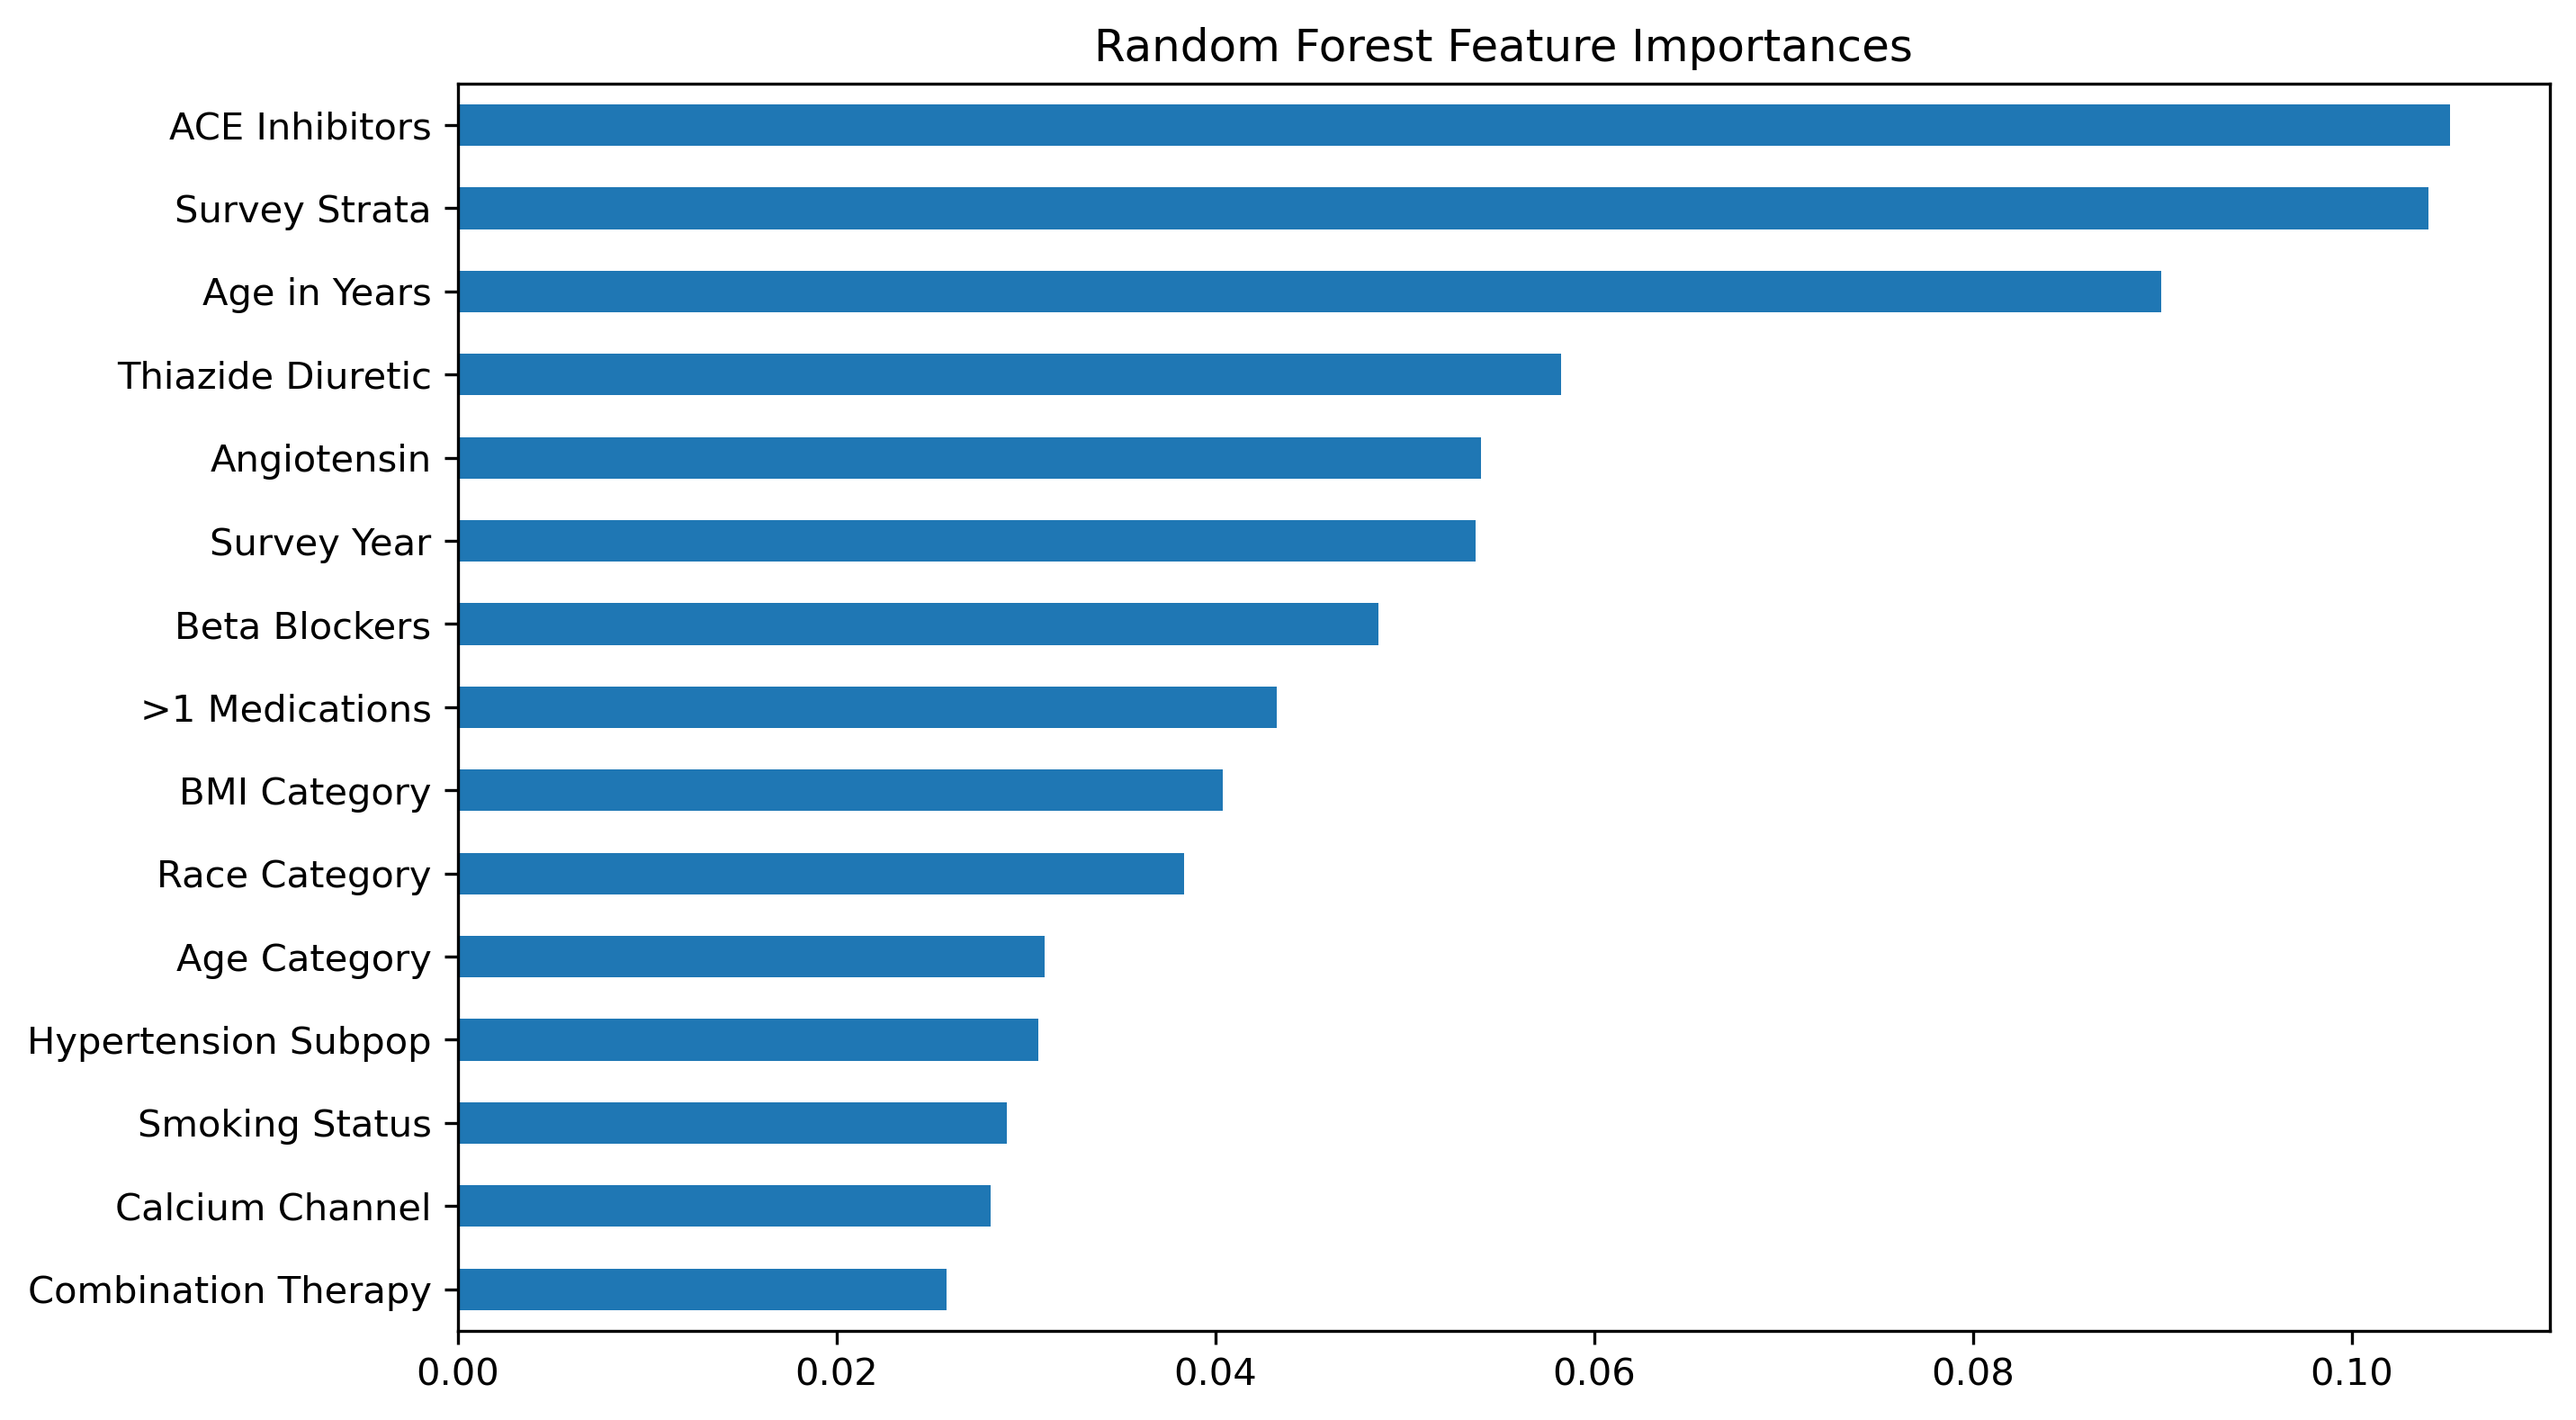

Potassium Sparing      0.009463
BMI Category           0.010837
Combination Therapy    0.011854
Race Category          0.016191
Kidney Disease         0.024704
DH Calcium Channel     0.027060
Survey Strata          0.046358
>1 Medications         0.058418
Age in Years           0.058551
Hypertension Subpop    0.062305
Calcium Channel        0.076124
Beta Blockers          0.103146
Thiazide Diuretic      0.115075
Angiotensin            0.140072
ACE Inhibitors         0.181473
dtype: float64


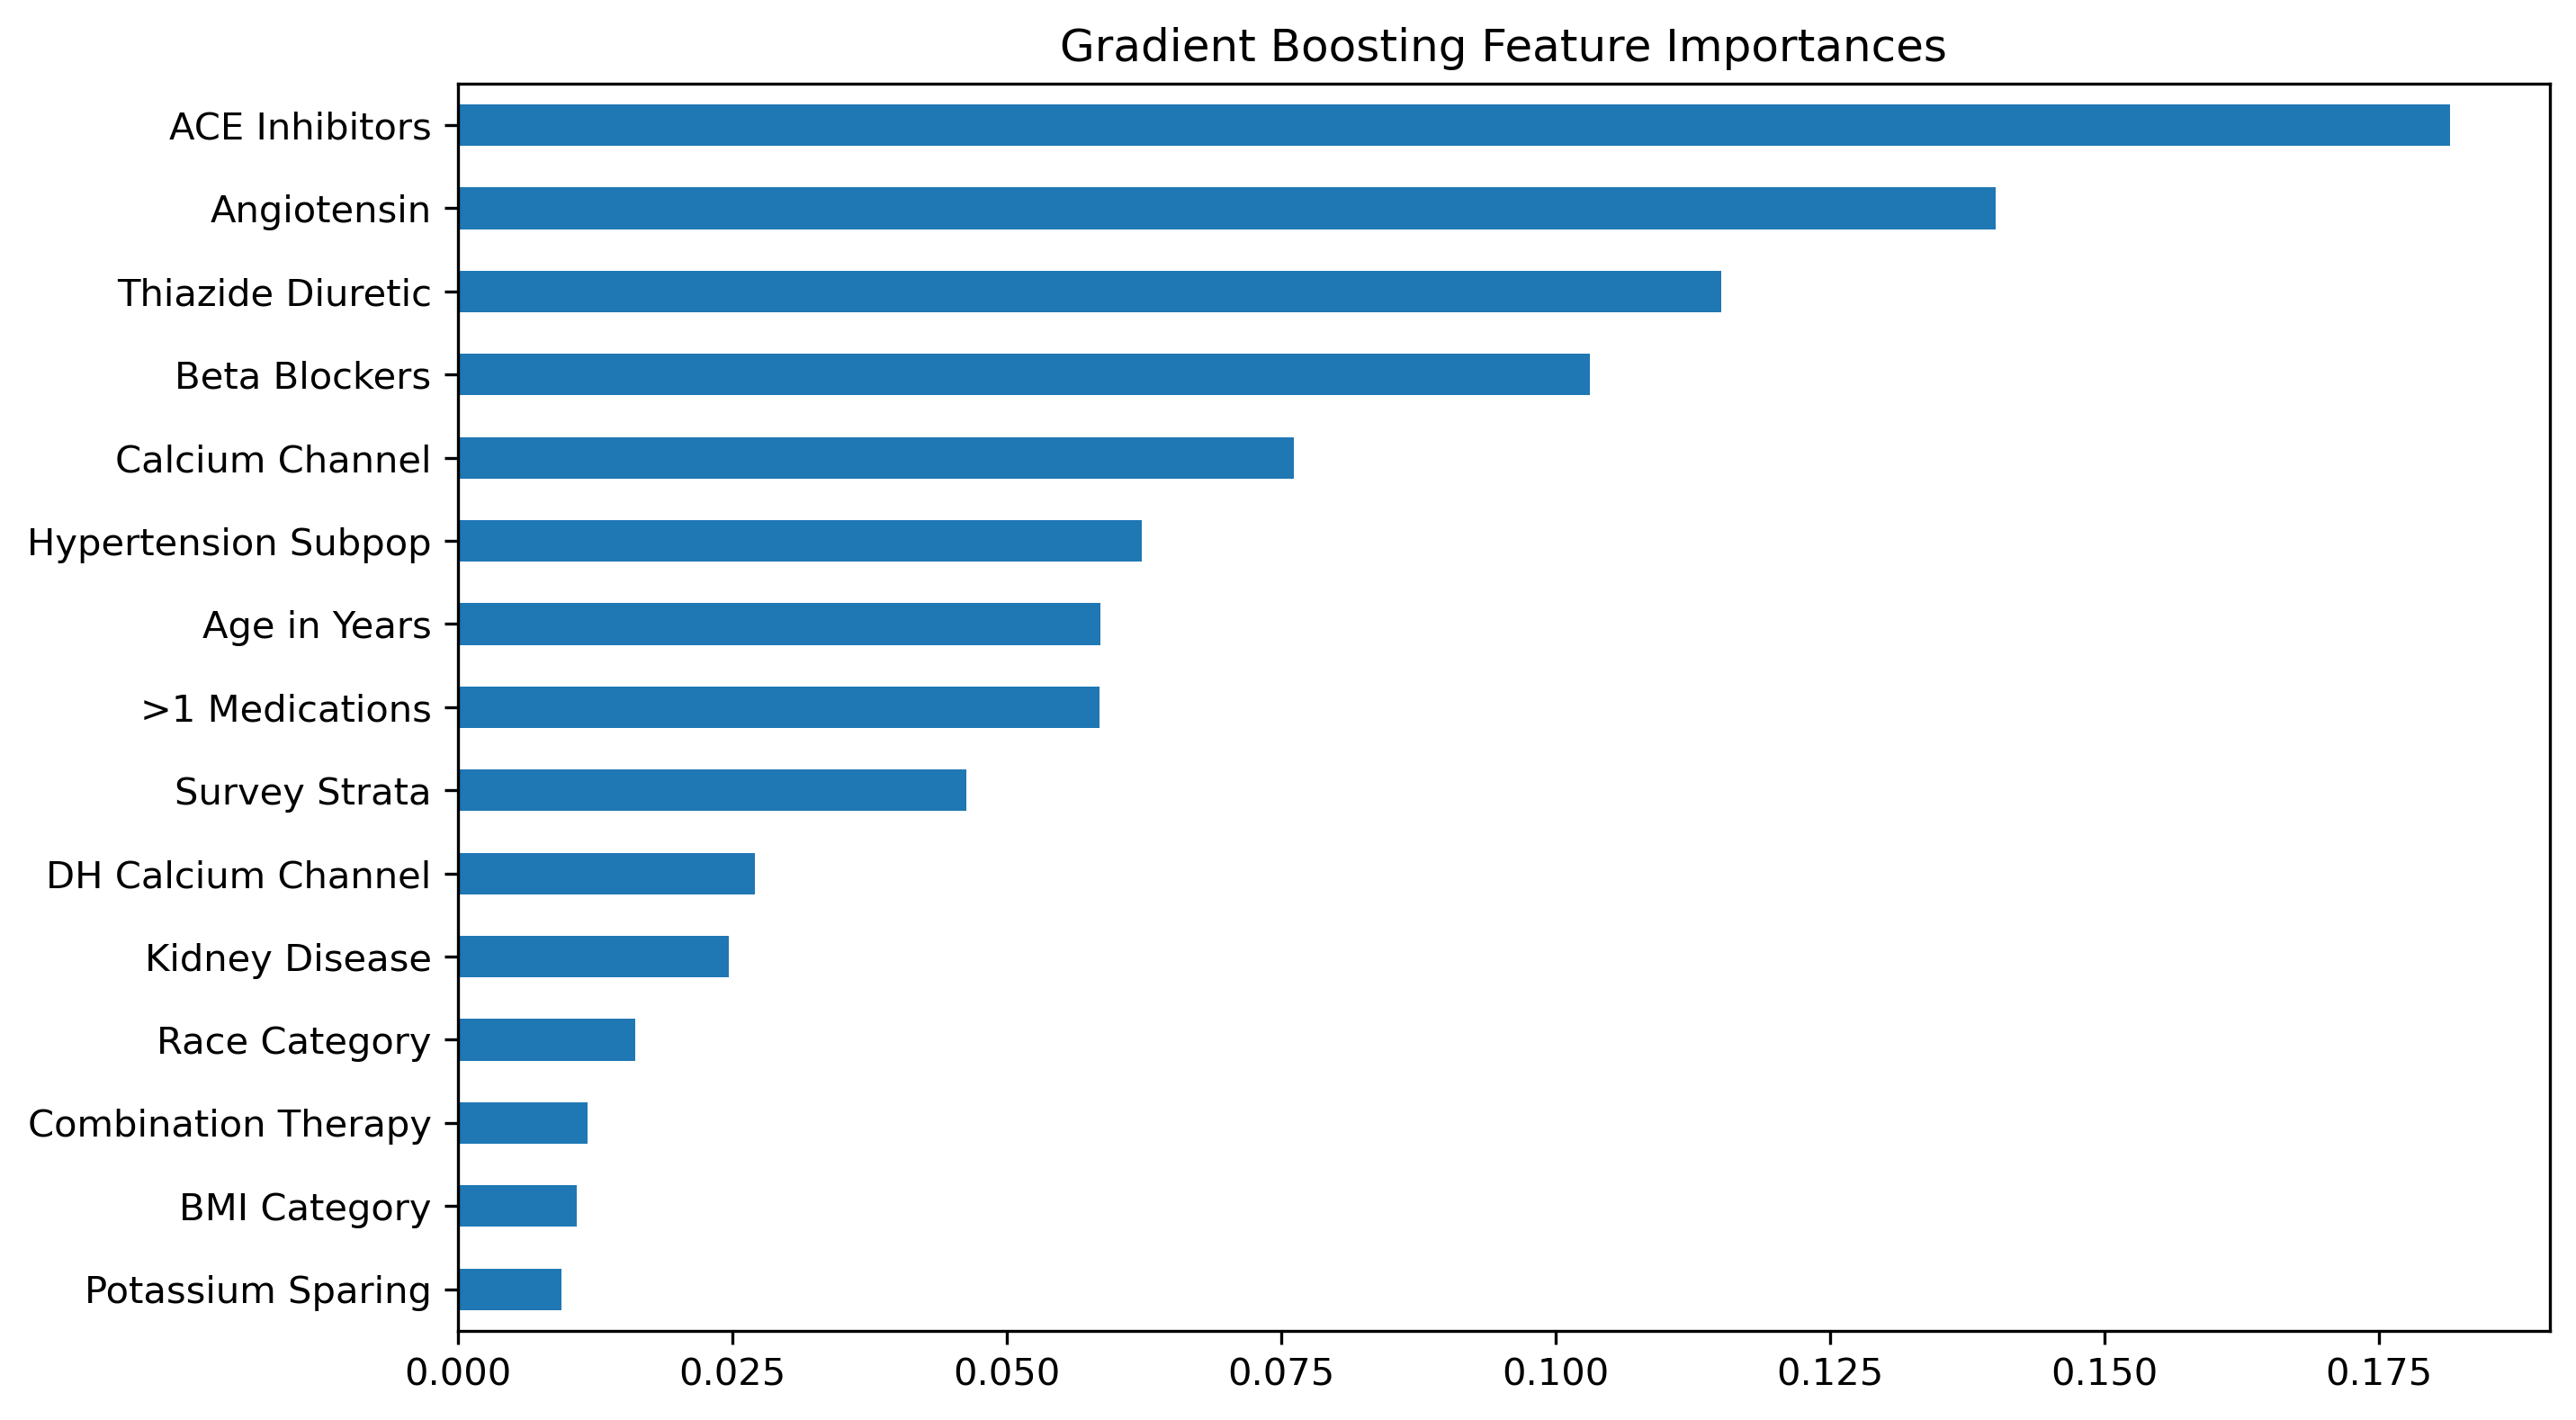

In [32]:
# helper functions 
def plot_feature_importances(importances, title, n=15):
    importances = importances.sort_values(ascending=True)[-n:]
    plt.figure(figsize=(10, 6), dpi=300)
    print(importances)
    importances.plot(kind='barh')
    plt.title(title)
    plt.show()

# Get feature importances
rf_importances = best_rf_model.feature_importances_
gb_importances = best_gb_model.feature_importances_

# Convert to pandas Series for easier plotting
import pandas as pd

feature_names_RF = X_train.columns  # Adjust if necessary
RF_new_names = {
    'bp_med_combination': "Combination Therapy" ,
    'bp_med_ccb': 'Calcium Channel',
    "cc_smoke":'Smoking Status',
    "svy_subpop_htn" :'Hypertension Subpop',
    "demo_age_cat" : 'Age Category',
    "demo_race" : 'Race Category',
    "cc_bmi" : 'BMI Category',
    "bp_med_pills_gteq_2" : '>1 Medications',
    "bp_med_beta" : "Beta Blockers",
    "svy_year" : "Survey Year",
    "bp_med_angioten" : "Angiotensin",
    "bp_med_diur_thz" : "Thiazide Diuretic",
    "demo_age_years" : "Age in Years",
    "svy_strata" : "Survey Strata",
    "bp_med_ace" : "ACE Inhibitors"
}
feature_names_RF = [RF_new_names.get(name, name) for name in X_train.columns]

feature_names_XG = X_train.columns  # Adjust if necessary
XG_new_names = { 
    "bp_med_diur_Ksparing" : 'Potassium Sparing',
    "cc_bmi" : 'BMI Category',
    "bp_med_combination" : 'Combination Therapy',
    "demo_race" : 'Race Category',
    "cc_ckd" : "Kidney Disease",
    "bp_med_ccb_dh" : "DH Calcium Channel",
    "svy_strata" : "Survey Strata",
    "bp_med_pills_gteq_2" : ">1 Medications",
    "demo_age_years" : "Age in Years", 
    "svy_subpop_htn" : "Hypertension Subpop",
    "bp_med_ccb" : "Calcium Channel",
    "bp_med_beta" : "Beta Blockers",
    "bp_med_diur_thz" : "Thiazide Diuretic",
    "bp_med_angioten" : "Angiotensin",
    "bp_med_ace" : "ACE Inhibitors"
}
feature_names_XG = [XG_new_names.get(name, name) for name in X_train.columns]



rf_importances = pd.Series(rf_importances, index=feature_names_RF)
gb_importances = pd.Series(gb_importances, index=feature_names_XG)

# Plot for Random Forest
plot_feature_importances(rf_importances, 'Random Forest Feature Importances')

# Plot for Gradient Boosting
plot_feature_importances(gb_importances, 'Gradient Boosting Feature Importances')

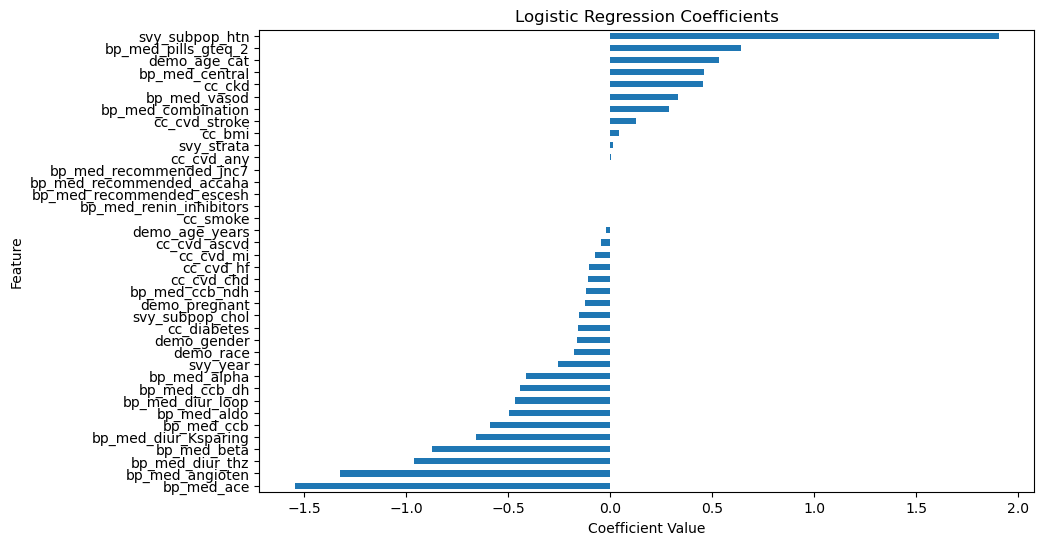

In [30]:
# Function to plot coefficients
def plot_coefficients(coefs, title):
    coefs = coefs.sort_values(ascending=True)
    plt.figure(figsize=(10, 6))
    coefs.plot(kind='barh')
    plt.title(title)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()

# Get coefficients from the model
coefficients = best_lr_model.coef_[0]  # Coefficients for the features

# Convert to pandas Series for easier plotting
feature_names = X_train.columns  # Adjust if necessary
coefficients = pd.Series(coefficients, index=feature_names)

# Plot coefficients
plot_coefficients(coefficients, 'Logistic Regression Coefficients')

# Plot Logistic Results - top 15


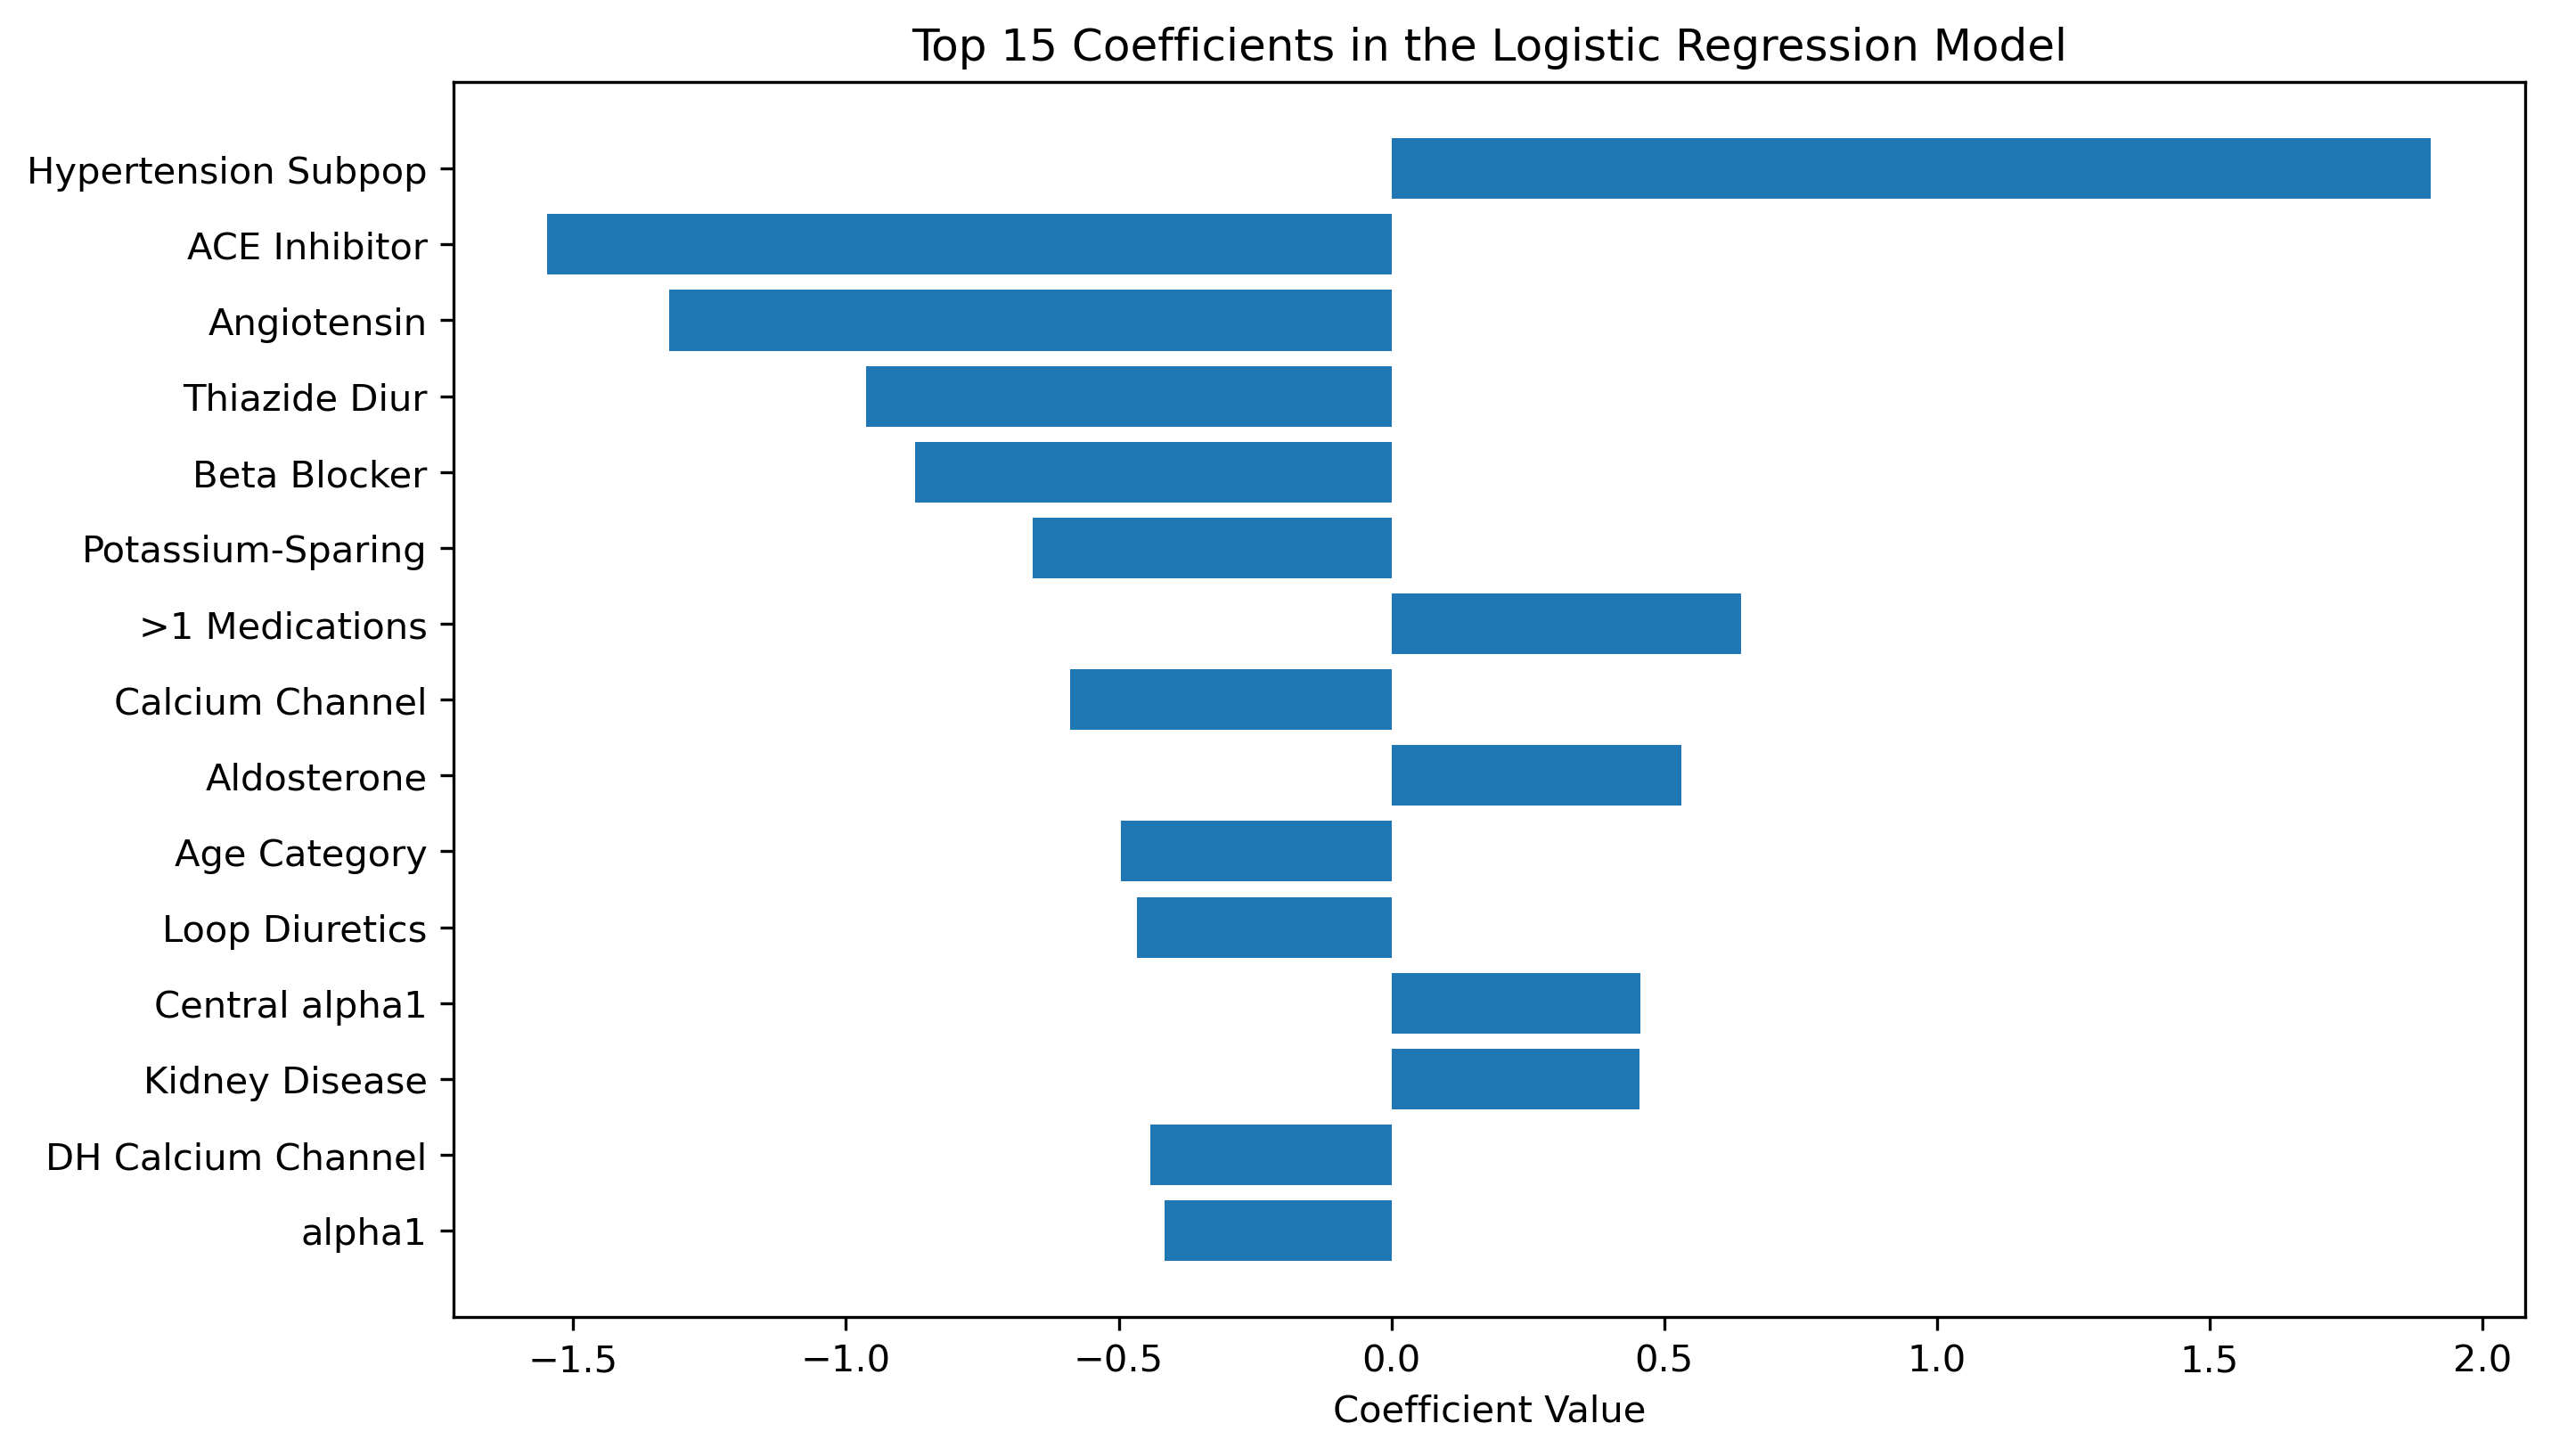

In [21]:

# Extract coefficients
coefficients = best_lr_model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame for easier handling
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Find top 15 
coef_df['abs_value'] = coef_df['Coefficient'].abs()
top_15_coef = coef_df.sort_values(by='abs_value', ascending=False).head(15)
rename_LR = ['Hypertension Subpop', 'ACE Inhibitor', 'Angiotensin', 'Thiazide Diur', 'Beta Blocker' , 'Potassium-Sparing', '>1 Medications', 'Calcium Channel', 'Aldosterone', 'Age Category', 'Loop Diuretics', 'Central alpha1', 'Kidney Disease','DH Calcium Channel', 'alpha1' ]

top_15_coef['Feature'] = rename_LR
plt.figure(figsize=(10, 6), dpi=300)
plt.barh(top_15_coef['Feature'], top_15_coef['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Coefficients in the Logistic Regression Model')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()



# Redo Logistic Regression

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your DataFrame of features
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)


# Function to plot significant coefficients
def plot_significant_coeffs(coeffs, title):
    coeffs = coeffs['Coef.'].sort_values(ascending=True)
    plt.figure(figsize=(10, 6))
    coeffs.plot(kind='barh')
    plt.title(title)
    plt.show()

# Add a constant to X for the intercept
X_train_with_const = sm.add_constant(X_train)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train_with_const).fit()

# Get the model summary
summary = model.summary2().tables[1]  # summary2() provides a more detailed summary
print(summary)
significant_coeffs = summary[summary['P>|z|'] < 0.05]

# Plot significant coefficients
plot_significant_coeffs(significant_coeffs, 'Significant Coefficients in Logistic Regression')



                      feature         VIF
0                  svy_strata  176.950364
1                    svy_year  177.420144
2              svy_subpop_htn   13.803534
3             svy_subpop_chol    1.714121
4                demo_age_cat   22.550930
5                   demo_race    3.996937
6              demo_age_years   55.602453
7               demo_pregnant    1.016209
8                 demo_gender    2.253789
9     bp_med_recommended_jnc7         NaN
10  bp_med_recommended_accaha         NaN
11  bp_med_recommended_escesh         NaN
12         bp_med_combination    2.668395
13        bp_med_pills_gteq_2    5.568579
14                 bp_med_ace    2.296626
15                bp_med_aldo    1.076724
16               bp_med_alpha    1.116197
17            bp_med_angioten    1.898948
18                bp_med_beta    2.291525
19             bp_med_central    1.076829
20                 bp_med_ccb  227.005015
21              bp_med_ccb_dh  180.371538
22             bp_med_ccb_ndh   44

LinAlgError: Singular matrix